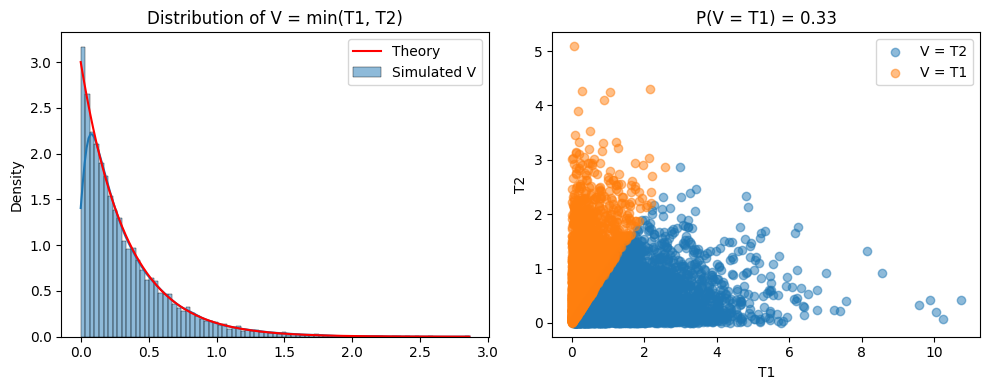

(b) Simulated Pr(V > 3.0 | V > 1.0) = 0.0000
    Theoretical Pr(V > 3.0 | V > 1.0) = 0.0025


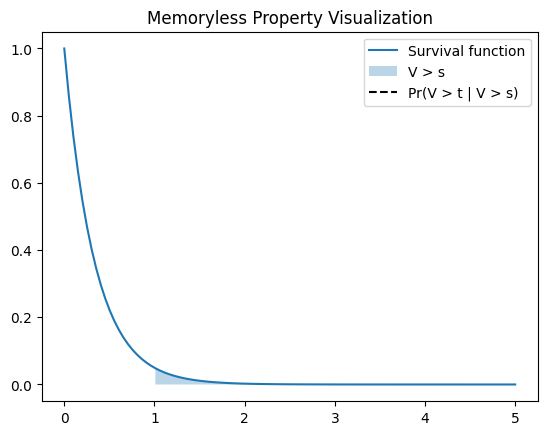

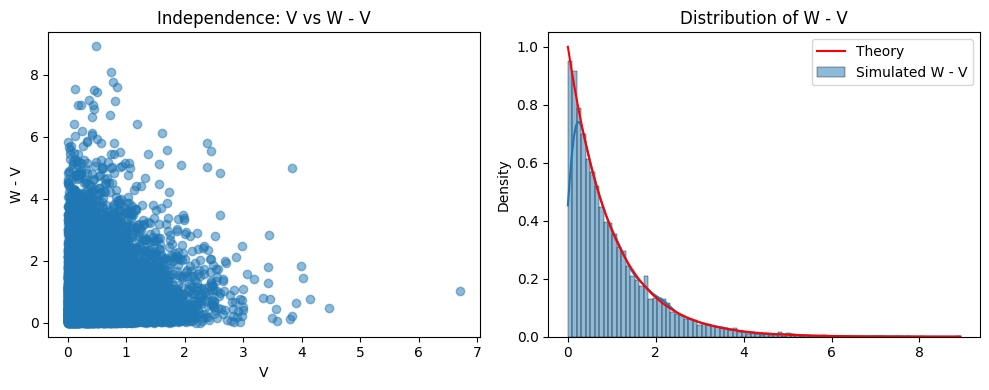

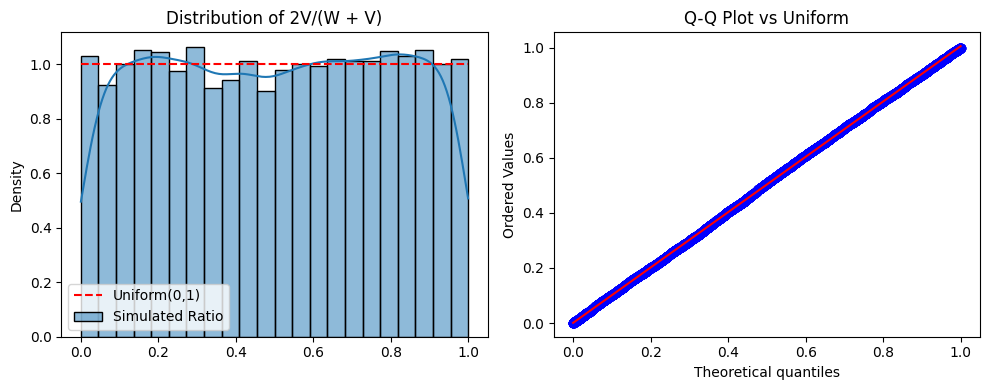

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set parameters
lambda1, lambda2 = 1.0, 2.0  # Different rates for parts (a)-(b)
lambda_ = 1.0  # Equal rates for parts (c)-(d)
n_samples = 10000

# Generate data
np.random.seed(0)
T1 = np.random.exponential(1/lambda1, n_samples)
T2 = np.random.exponential(1/lambda2, n_samples)
V = np.minimum(T1, T2)
W = np.maximum(T1, T2)

# =================================
# (a) Distribution of V and P(V = T1)
# =================================
plt.figure(figsize=(10, 4))

# Histogram of V vs theoretical PDF
plt.subplot(1, 2, 1)
sns.histplot(V, kde=True, stat='density', label='Simulated V')
x = np.linspace(0, V.max(), 1000)
plt.plot(x, (lambda1 + lambda2) * np.exp(-(lambda1 + lambda2)*x), 'r', label='Theory')
plt.title('Distribution of V = min(T1, T2)')
plt.legend()

# Scatter plot of T1 vs T2 with V = T1 highlighted
plt.subplot(1, 2, 2)
mask = T1 < T2
plt.scatter(T1[~mask], T2[~mask], alpha=0.5, label='V = T2')
plt.scatter(T1[mask], T2[mask], alpha=0.5, label='V = T1')
plt.xlabel('T1'), plt.ylabel('T2')
plt.title(f'P(V = T1) = {lambda1/(lambda1 + lambda2):.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# =================================
# (b) Memoryless Property: Pr(V > t | V > s)
# =================================
s, t = 1.0, 3.0
conditional_prob = np.sum(V > t) / np.sum(V > s)
theoretical_prob = np.exp(-(lambda1 + lambda2)*(t - s))

print(f"(b) Simulated Pr(V > {t} | V > {s}) = {conditional_prob:.4f}")
print(f"    Theoretical Pr(V > {t} | V > {s}) = {theoretical_prob:.4f}")

# Survival plot
plt.figure()
surv = lambda x: np.exp(-(lambda1 + lambda2)*x)
x_vals = np.linspace(0, 5, 100)
plt.plot(x_vals, surv(x_vals), label='Survival function')
plt.fill_between(x_vals, surv(x_vals), where=(x_vals > s), alpha=0.3, label='V > s')
plt.vlines(t, 0, surv(t), color='black', linestyle='--', label=f'Pr(V > t | V > s)')
plt.title('Memoryless Property Visualization')
plt.legend()
plt.show()

# =================================
# (c) Independence of V and W - V (λ1 = λ2 = λ)
# =================================
# Regenerate data with equal rates
T1 = np.random.exponential(1/lambda_, n_samples)
T2 = np.random.exponential(1/lambda_, n_samples)
V = np.minimum(T1, T2)
W = np.maximum(T1, T2)
W_minus_V = W - V

# Scatter plot and marginals
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(V, W_minus_V, alpha=0.5)
plt.xlabel('V'), plt.ylabel('W - V')
plt.title('Independence: V vs W - V')

plt.subplot(1, 2, 2)
sns.histplot(W_minus_V, kde=True, stat='density', label='Simulated W - V')
x = np.linspace(0, W_minus_V.max(), 1000)
plt.plot(x, lambda_ * np.exp(-lambda_*x), 'r', label='Theory')
plt.title('Distribution of W - V')
plt.legend()
plt.tight_layout()
plt.show()

# =================================
# (d) Distribution of 2V/(W + V)
# =================================
ratio = 2 * V / (W + V)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(ratio, kde=True, stat='density', label='Simulated Ratio')
plt.plot([0, 1], [1, 1], 'r--', label='Uniform(0,1)')
plt.title('Distribution of 2V/(W + V)')
plt.legend()

plt.subplot(1, 2, 2)
stats.probplot(ratio, dist=stats.uniform, plot=plt)
plt.title('Q-Q Plot vs Uniform')
plt.tight_layout()
plt.show()